# Варченко Кирилл, Модульная домашняя работа №2, анализ данных

**Вариант 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

/home/kirill/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
data = pd.read_csv('MHW2_data/215931745_102011_1126_airline_delay_causes.csv', usecols=range(21))

## Общий осмотр и описательные статистики

In [17]:
data

year   month carrier            carrier_name airport  \
0       2003       6      AA  American Airlines Inc.     ABQ   
1       2003       6      AA  American Airlines Inc.     ANC   
2       2003       6      AA  American Airlines Inc.     ATL   
3       2003       6      AA  American Airlines Inc.     AUS   
4       2003       6      AA  American Airlines Inc.     BDL   
...      ...     ...     ...                     ...     ...   
147295  2011      10      YV      Mesa Airlines Inc.     SRQ   
147296  2011      10      YV      Mesa Airlines Inc.     STL   
147297  2011      10      YV      Mesa Airlines Inc.     SYR   
147298  2011      10      YV      Mesa Airlines Inc.     TUS   
147299  2011      10      YV      Mesa Airlines Inc.     YUM   

                                             airport_name  arr_flights  \
0       Albuquerque, NM: Albuquerque International Sun...        307.0   
1       Anchorage, AK: Ted Stevens Anchorage Internati...         90.0   
2       Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        752.0   
3            Austin, TX: Austin - Bergstrom International        842.0   
4                     Hartford, CT: Bradley International        383.0   
...                                                   ...          ...   
147295  Sarasota/Bradenton, FL: Sarasota/Bradenton Int...          2.0   
147296     St. Louis, MO: Lambert-St. Louis International         42.0   
147297       Syracuse, NY: Syracuse Hancock International         46.0   
147298                   Tucson, AZ: Tucson International        275.0   
147299             Yuma, AZ: Yuma MCAS/Yuma International        178.0   

        arr_del15  carrier_ct   weather_ct  ...  late_aircraft_ct  \
0            56.0       14.68        10.79  ...              9.96   
1            27.0        7.09         2.00  ...              7.16   
2           186.0       33.99        27.82  ...             17.53   
3           174.0       60.24        20.54  ...             40.75   
4            55.0       14.90         8.91  ...             16.61   
...           ...         ...          ...  ...               ...   
147295        0.0        0.00         0.00  ...              0.00   
147296        5.0        2.97         0.00  ...              0.00   
147297        7.0        4.40         0.00  ...              1.90   
147298       22.0       13.26         2.00  ...              3.76   
147299       13.0        8.48         0.00  ...              2.22   

        arr_cancelled  arr_diverted   arr_delay   carrier_delay  \
0                 1.0           1.0      2530.0           510.0   
1                 0.0           0.0      1390.0           271.0   
2                 5.0           0.0      8314.0          1367.0   
3                 9.0           1.0      8344.0          3040.0   
4                 0.0           0.0      3137.0           815.0   
...               ...           ...         ...             ...   
147295            0.0           0.0         0.0             0.0   
147296            0.0           0.0       190.0           151.0   
147297            0.0           0.0       372.0           283.0   
147298            1.0           0.0      1400.0          1054.0   
147299            7.0           0.0       747.0           571.0   

        weather_delay  nas_delay  security_delay  late_aircraft_delay  \
0               621.0      676.0            25.0                698.0   
1                83.0      581.0             0.0                455.0   
2              1722.0     3817.0           139.0               1269.0   
3              1032.0     1835.0           115.0               2322.0   
4               574.0      555.0             0.0               1193.0   
...               ...        ...             ...                  ...   
147295            0.0        0.0             0.0                  0.0   
147296            0.0       39.0             0.0                  0.0   
147297            0.0       18.0             0.0           

In [3]:
# Данных много, поэтому можно дропнуть НА
data.dropna(inplace=True)

In [4]:
# Время в мин на каждый задержанный рейс
data['delay_per_del15'] = data[' arr_delay'] / data['arr_del15']
# Доля задержанных рейсов от всех
data['del15_per_flight'] = data['arr_del15'] / data['arr_flights']

## Pairplot

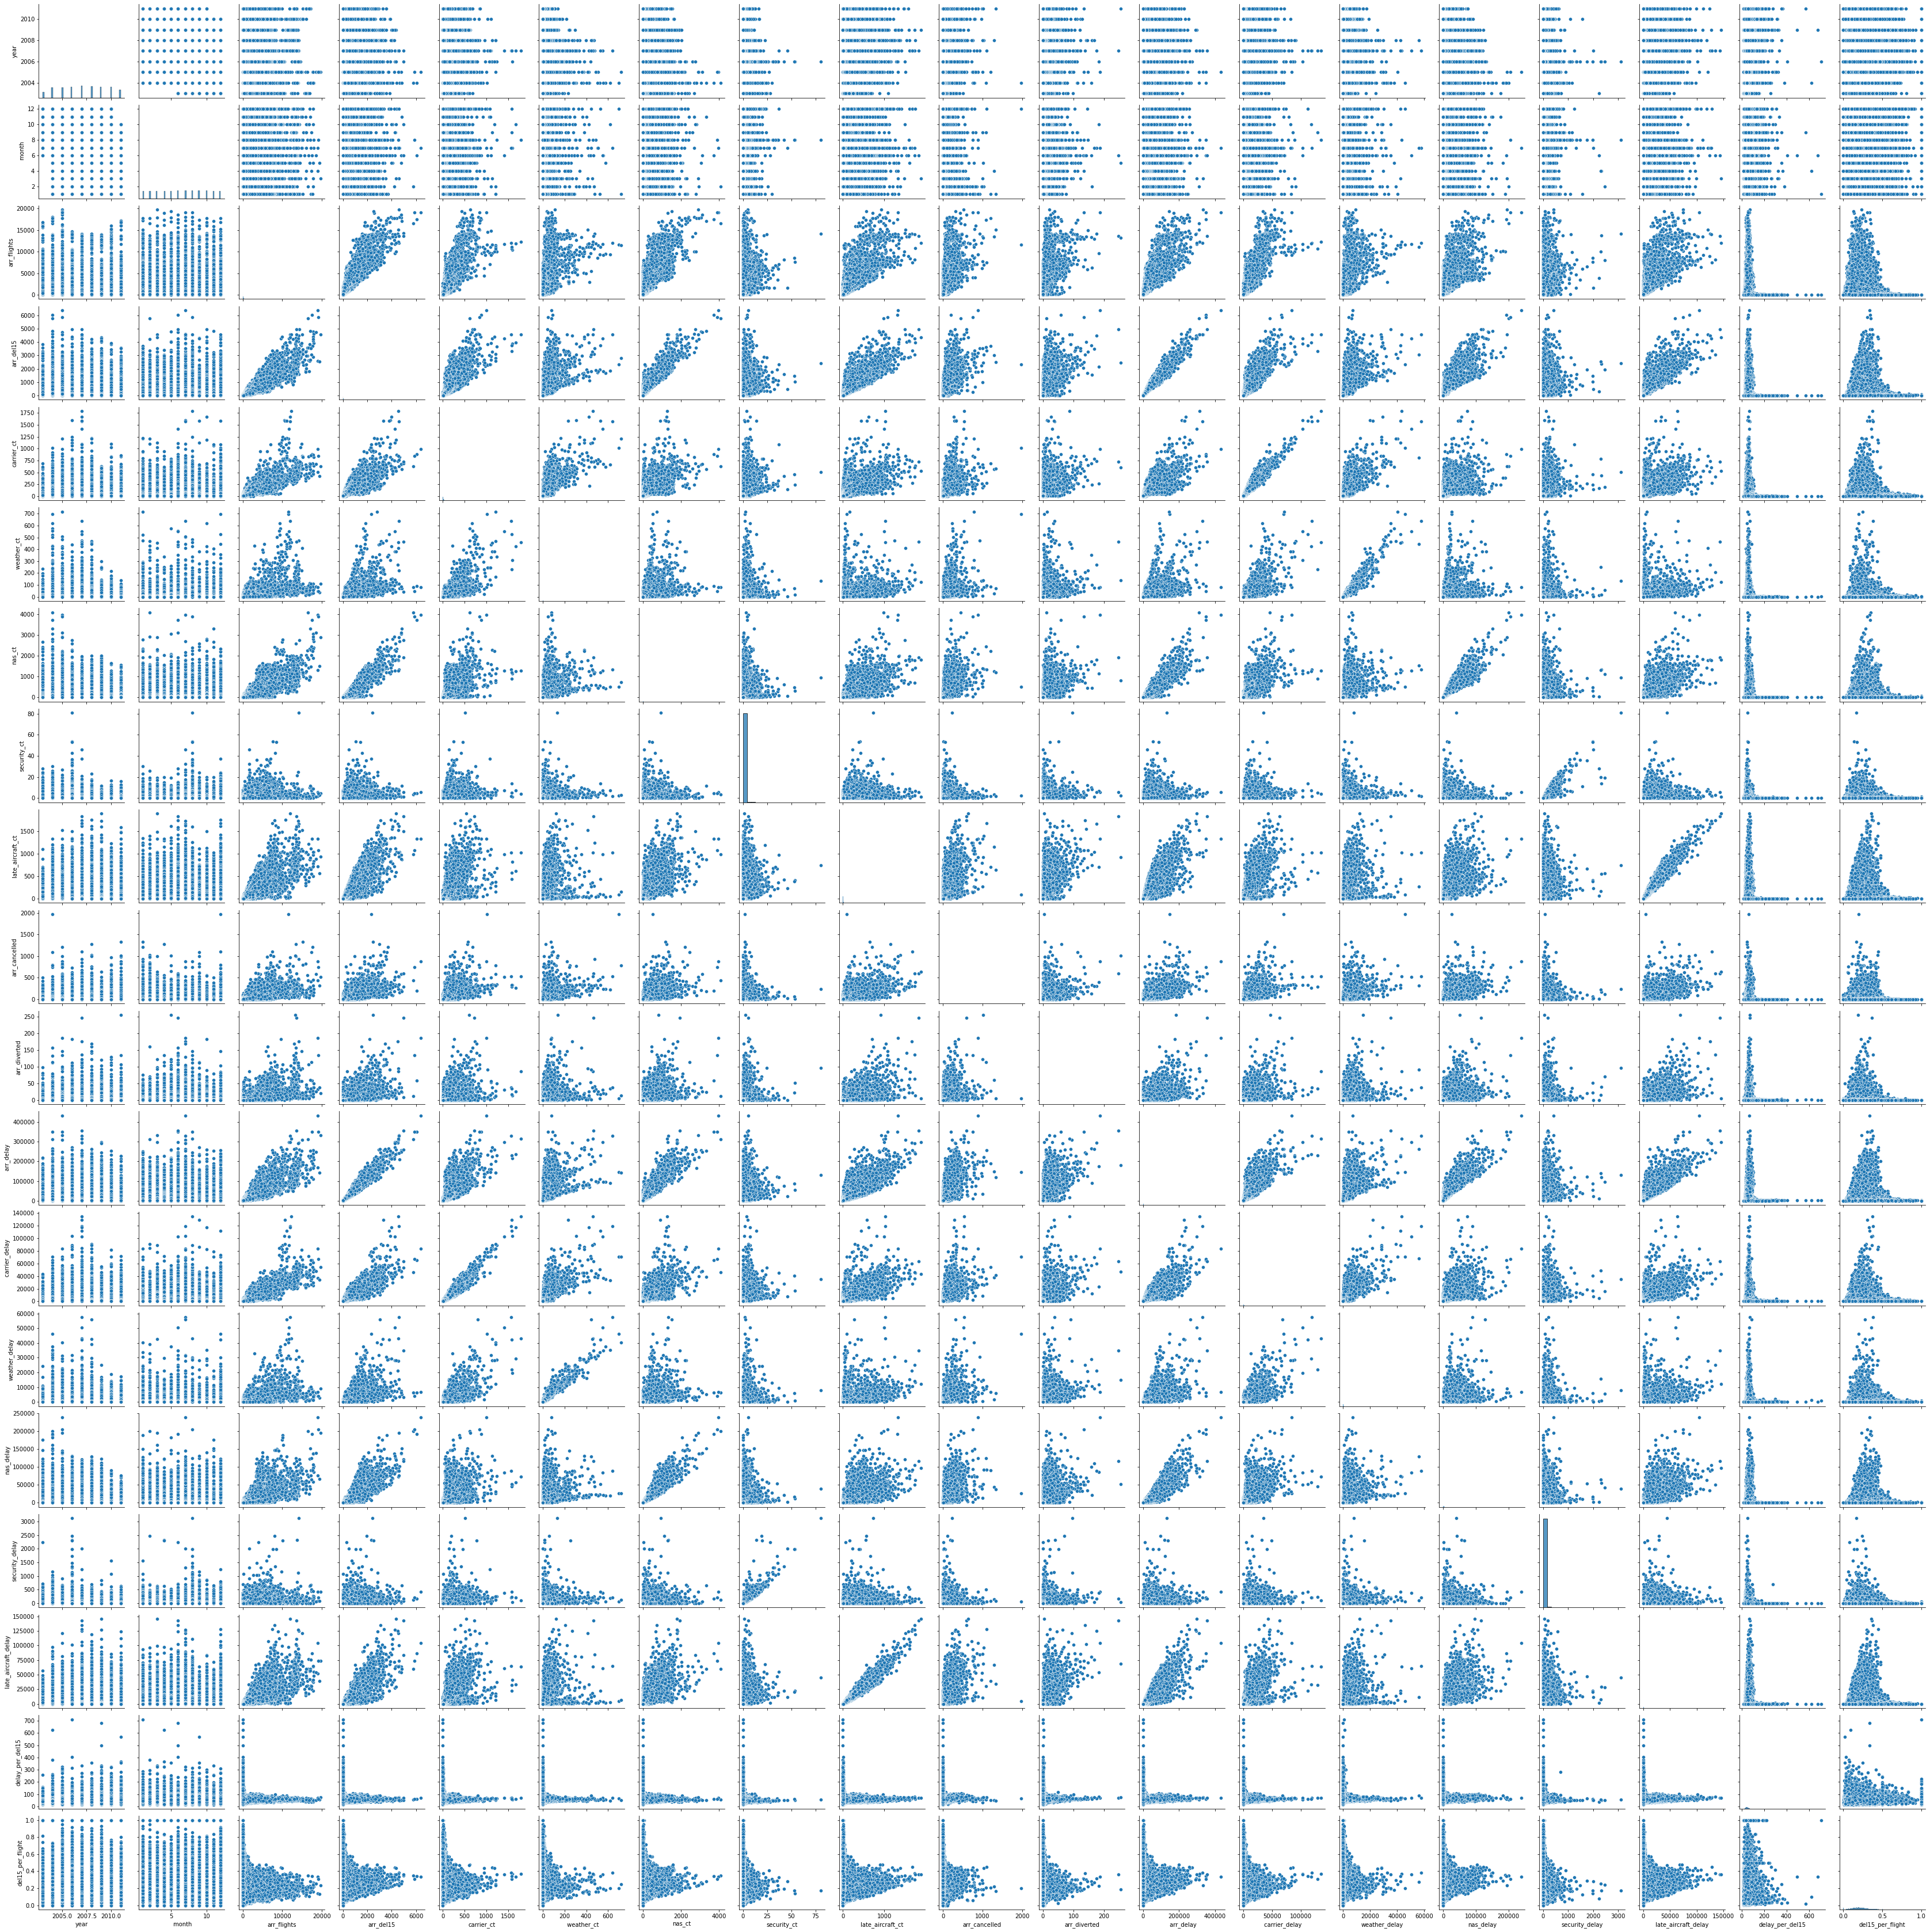

In [5]:
sns.pairplot(data=data)

In [8]:
data.rcorr(method='pearson')

year   month arr_flights arr_del15 carrier_ct  \
year                      -     ***         ***       ***        ***   
 month               -0.119       -                                    
arr_flights          -0.019   0.003           -       ***        ***   
arr_del15            -0.023  -0.004       0.929         -        ***   
carrier_ct            -0.02  -0.001       0.866     0.889          -   
 weather_ct          -0.052  -0.008       0.585     0.632      0.709   
nas_ct               -0.034  -0.003       0.829     0.933      0.734   
security_ct          -0.044   0.005       0.502      0.49      0.522   
late_aircraft_ct      0.002  -0.004        0.87     0.911      0.784   
arr_cancelled        -0.004   -0.03       0.676     0.742      0.655   
arr_diverted          0.009  -0.004       0.638     0.664      0.558   
 arr_delay           -0.012  -0.004       0.881      0.98      0.849   
 carrier_delay       -0.001  -0.003       0.862     0.899      0.965   
weather_delay         -0.04  -0.008       0.597     0.659      0.709   
nas_delay            -0.027  -0.002       0.721     0.861      0.638   
security_delay       -0.045   0.003       0.465     0.454      0.469   
late_aircraft_delay   0.007  -0.005       0.842     0.911      0.764   
delay_per_del15       0.101  -0.017       0.035     0.072      0.052   
del15_per_flight     -0.052  -0.038      -0.045     0.069      0.068   

                     weather_ct nas_ct security_ct late_aircraft_ct  \
year                        ***    ***         ***                    
 month                       **                                       
arr_flights                 ***    ***         ***              ***   
arr_del15                   ***    ***         ***              ***   
carrier_ct                  ***    ***         ***              ***   
 weather_ct                   -    ***         ***              ***   
nas_ct                    0.537      -         ***              ***   
security_ct               0.325  0.376           -              ***   
late_aircraft_ct          0.461  0.746       0.489                -   
arr_cancelled             0.568  0.693         0.3            0.663   
arr_diverted              0.459  0.613       0.315            0.626   
 arr_delay                 0.63  0.932       0.442            0.883   
 carrier_delay            0.721   0.78       0.462            0.771   
weather_delay             0.962  0.563       0.332            0.508   
nas_delay                 0.487  0.954       0.314            0.673   
security_delay              0.3  0.369       0.888            0.435   
late_aircraft_delay       0.463  0.771       0.447             0.98   
delay_per_del15           0.073   0.07      -0.001            0.066   
del15_per_flight          0.072  0.077       0.007            0.037   

                    arr_cancelled arr_diverted  arr_delay  carrier_delay  \
year                                       ***        ***                  
 month                        ***                                          
arr_flights                   ***          ***        ***            ***   
arr_del15                     ***          ***        ***            ***   
carrier_ct                    ***          ***        ***            ***   
 weather_ct                   ***          ***        ***            ***   
nas_ct                        ***          ***        ***            ***   
security_ct                   ***          ***        ***            ***   
late_aircraft_ct              ***          ***        ***            ***   
arr_cancelled                   -          ***        ***            ***   
arr_diverted                0.532            -        ***            ***   
 arr_delay                  0.769        0.687          -            ***   
 carrier_delay              0.697        0.607      0.886              -   
weather_delay               0.604        0.515      0.674          0.737   
nas_delay            

`*** - p-value < 0.001`
`** - p-value < 0.01`
`* - p-value < 0.05`

То что переменные _delay и _ct коррелированны это более-менее понятно, потому что одни показывают суммарную длительность задержки, а вторые --- количество задержанных рейсов.

## Частоты по категориальным переменным


## Описательные статистики

In [27]:
data[['delay_per_del15', 'del15_per_flight']].describe()

delay_per_del15  del15_per_flight
count    144559.000000     147028.000000
mean         50.791776          0.219051
std          16.682019          0.112758
min          15.000000          0.000000
25%          40.552506          0.142857
50%          49.000000          0.205882
75%          58.666667          0.280702
max         710.000000          1.000000

## Гистрограммы и скаттерплоты

<AxesSubplot:xlabel='del15_per_flight', ylabel='Count'>

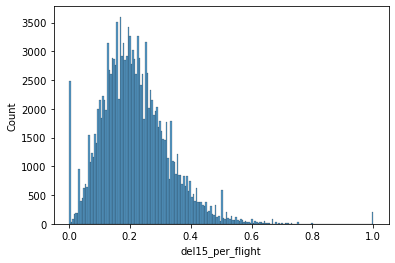

In [28]:
# Доля задержанных рейсов от всех
sns.histplot(data=data, x='del15_per_flight')

In [9]:
# Проверим на нормальность Shapiro-Wilk test 
pg.normality(data['del15_per_flight'])

/home/kirill/miniconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


W  pval  normal
del15_per_flight  0.948558   0.0   False

<AxesSubplot:xlabel='delay_per_del15', ylabel='Count'>

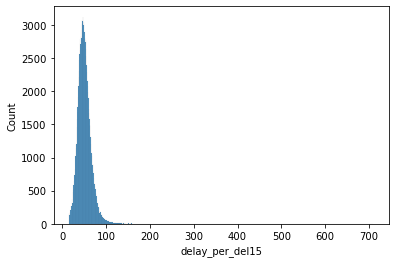

In [29]:
# Время в мин на каждый задержанный рейс
sns.histplot(data=data, x='delay_per_del15')

In [10]:
# Проверим на нормальность Shapiro-Wilk test 
pg.normality(data['delay_per_del15'])

/home/kirill/miniconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


W  pval  normal
delay_per_del15  0.860158   0.0   False

**Вывод:** оба признака не распределены нормально.

<AxesSubplot:xlabel='carrier', ylabel='del15_per_flight'>

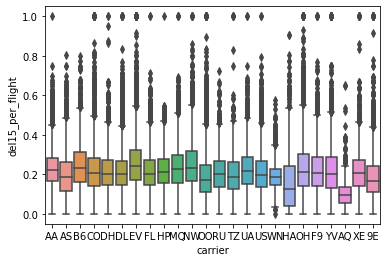

In [34]:
# Боксплот доли задержанных вылетов по авиакомпаниям
sns.boxplot(data=data, y='del15_per_flight', x='carrier')

<AxesSubplot:xlabel='carrier', ylabel='delay_per_del15'>

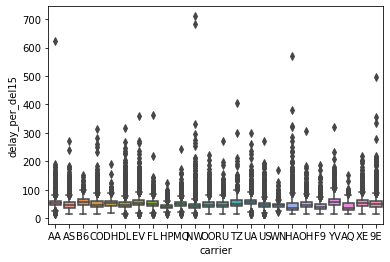

In [35]:
# Боксплот время зажержки на вылет по авиакомпаниям
sns.boxplot(data=data, y='delay_per_del15', x='carrier')

## Гипотеза

Проверим гипотезу о том, что средняя доля задержанных вылетов одинаковая для всех авиаперевозчиков. Для этого воспользуемся парным непараметрическим тестом (Манна-Уитни) с поправкой Бонферрони.

In [63]:
res = pg.pairwise_ttests(data=data, dv='del15_per_flight', between='carrier', padjust='bonf', parametric=False)

In [64]:
res

Contrast   A   B  Paired  Parametric       U-val       Tail  \
0    carrier  9E  AA   False       False  15698353.5  two-sided   
1    carrier  9E  AQ   False       False   1049122.5  two-sided   
2    carrier  9E  AS   False       False  12081170.5  two-sided   
3    carrier  9E  B6   False       False   7443349.0  two-sided   
4    carrier  9E  CO   False       False  15318989.5  two-sided   
..       ...  ..  ..     ...         ...         ...        ...   
271  carrier  US  XE   False       False  25535079.5  two-sided   
272  carrier  US  YV   False       False  26918078.0  two-sided   
273  carrier  WN  XE   False       False  20027457.0  two-sided   
274  carrier  WN  YV   False       False  21544695.5  two-sided   
275  carrier  XE  YV   False       False  26583263.5  two-sided   

             p-unc         p-corr p-adjust    hedges  
0    5.853631e-211  1.615602e-208     bonf -0.458068  
1     4.931090e-37   1.360981e-34     bonf  0.626677  
2     4.500069e-17   1.242019e-14     bonf -0.157499  
3    6.607542e-164  1.823682e-161     bonf -0.525796  
4     4.777080e-82   1.318474e-79     bonf -0.299933  
..             ...            ...      ...       ...  
271   2.462417e-03   6.796272e-01     bonf  0.002791  
272   3.123039e-02   1.000000e+00     bonf -0.043248  
273   4.334845e-39   1.196417e-36     bonf -0.244152  
274   3.077879e-26   8.494945e-24     bonf -0.260088  
275   8.566029e-01   1.000000e+00     bonf -0.046810  

[276 rows x 11 columns]

In [65]:
res.loc[res['p-corr'] < 0.05, ['A', 'B']]

A   B
0    9E  AA
1    9E  AQ
2    9E  AS
3    9E  B6
4    9E  CO
..   ..  ..
268  UA  XE
269  UA  YV
270  US  WN
273  WN  XE
274  WN  YV

[215 rows x 2 columns]

215 из 276 пар с $\alpha=0.05$ имеют разные средние доли задержанных вылетов

## Среднее/медиана времени задержки вылетов по годам

In [43]:
data_agg = data.groupby(['year'])['delay_per_del15'].agg(delay_per_del15_mean='mean', delay_per_del15_median='median')

In [44]:
data_agg

delay_per_del15_mean  delay_per_del15_median
year                                              
2003             46.362744               44.904509
2004             48.197530               46.428571
2005             48.477348               46.833333
2006             50.837568               49.000000
2007             52.646416               51.150758
2008             52.468304               50.770642
2009             50.855879               49.000000
2010             51.785773               50.083333
2011             53.476128               51.706477

<AxesSubplot:xlabel='year'>

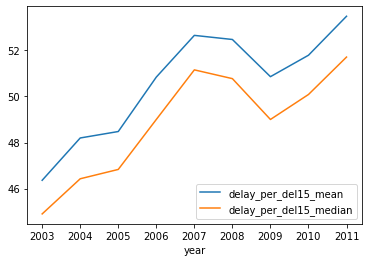

In [45]:
data_agg.plot()

In [48]:
# Линейная регрессия
lm = pg.linear_regression(data_agg.index, data_agg['delay_per_del15_mean'])
lm.round(2)

names     coef      se     T  pval    r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept -1474.96  325.33 -4.53   0.0  0.76    0.72  -2244.23    -705.68
1         x1     0.76    0.16  4.69   0.0  0.76    0.72      0.38       1.14

**Вывод:** Среднее время задержки увеличивается с каждым годом :(